<a href="https://colab.research.google.com/github/Sachinsatya/emp_abs_trend_analysis_usingML/blob/main/Emp_Abs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error

#import libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#os.chdir("C:\Users\Sachin MM\OneDrive\Documents\Project")

# Loading data
emp_absent = pd.read_excel("Absenteeism_at_work.xls")

In [ ]:
emp_absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,...,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,...,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0


Exploratory Data Analysis

In [ ]:
emp_absent.shape

(740, 21)

In [ ]:
emp_absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [ ]:
emp_absent.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [ ]:
emp_absent.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [ ]:
emp_absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
#Transform data types
emp_absent['ID'] = emp_absent['ID'].astype('category')

emp_absent['Reason for absence'] = emp_absent['Reason for absence'].replace(0,20)
emp_absent['Reason for absence'] = emp_absent['Reason for absence'].astype('category')

emp_absent['Month of absence'] = emp_absent['Month of absence'].replace(0,np.nan)
emp_absent['Month of absence'] = emp_absent['Month of absence'].astype('category')

emp_absent['Day of the week'] = emp_absent['Day of the week'].astype('category')
emp_absent['Seasons'] = emp_absent['Seasons'].astype('category')
emp_absent['Disciplinary failure'] = emp_absent['Disciplinary failure'].astype('category')
emp_absent['Education'] = emp_absent['Education'].astype('category')
emp_absent['Son'] = emp_absent['Son'].astype('category')
emp_absent['Social drinker'] = emp_absent['Social drinker'].astype('category')
emp_absent['Social smoker'] = emp_absent['Social smoker'].astype('category')
emp_absent['Pet'] = emp_absent['Pet'].astype('category')

In [ ]:
#Make a copy of dataframe
df = emp_absent.copy()

In [ ]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

Missing Value Analysis

In [ ]:
#Creating dataframe with number of missing values
missing_val = pd.DataFrame(df.isnull().sum())

#Reset the index to get row names as columns
missing_val = missing_val.reset_index()

In [ ]:
df.isnull().sum()

Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
                                  ..
Son_0.0                            0
Son_1.0                            0
Son_2.0                            0
Son_3.0                            0
Son_4.0                            0
Length: 115, dtype: int64

In [ ]:
missing_val

,index,0
0,ID,0
1,Reason for absence,3
2,Month of absence,4
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [ ]:

#Rename the columns
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_perc'})
missing_val

#Calculate percentage
missing_val['Missing_perc'] = (missing_val['Missing_perc']/len(df))*100

#Sort the rows according to decreasing missing percentage
missing_val = missing_val.sort_values('Missing_perc', ascending = False).reset_index(drop = True)

#Save output to csv file
missing_val.to_csv("Missing_perc.csv", index = False)

missing_val

,Variables,Missing_perc
0,Body mass index,0.566107
1,Absenteeism time in hours,0.401753
2,Height,0.255661
3,Work load Average/day,0.182615
4,Education,0.182615
5,Transportation expense,0.127831
6,Son,0.109569
7,Disciplinary failure,0.109569
8,Hit target,0.109569
9,Month of absence,0.073046


In [ ]:
len(df)

740

Impute missing values

In [ ]:
#Actual value = 31
#Mean = 26.67
#Median = 25
#KNN = 30.80
print(df['Body mass index'].iloc[1])

#Set the value of first row in Body mass index as NAN
#create missing value
df['Body mass index'].iloc[1] = np.nan
#Impute with mean
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].mean())

#Impute with median
#df['Body mass index'] = df['Body mass index'].fillna(df['Body mass index'].median())

#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
df['Body mass index'].iloc[1]
#Round the values of categorical values
for i in categorical_vars:
    df.loc[:,i] = df.loc[:,i].round()    
    df.loc[:,i] = df.loc[:,i].astype('category')
#Check if any missing values
df.isnull().sum()

31.0


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Imputing row 1/740 with 0 missing, elapsed time: 0.211
Imputing row 101/740 with 1 missing, elapsed time: 0.218
Imputing row 201/740 with 0 missing, elapsed time: 0.229
Imputing row 301/740 with 0 missing, elapsed time: 0.232
Imputing row 401/740 with 0 missing, elapsed time: 0.234
Imputing row 501/740 with 0 missing, elapsed time: 0.235
Imputing row 601/740 with 0 missing, elapsed time: 0.237
Imputing row 701/740 with 0 missing, elapsed time: 0.238


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `

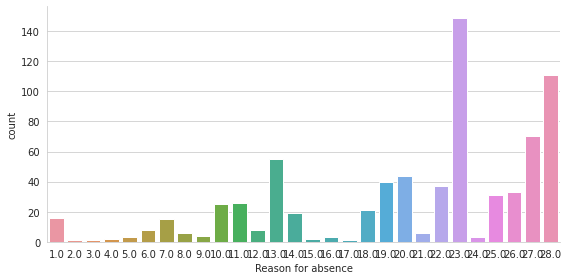

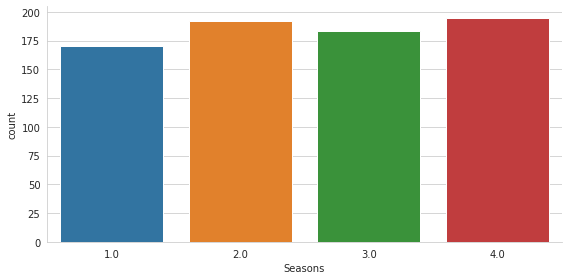

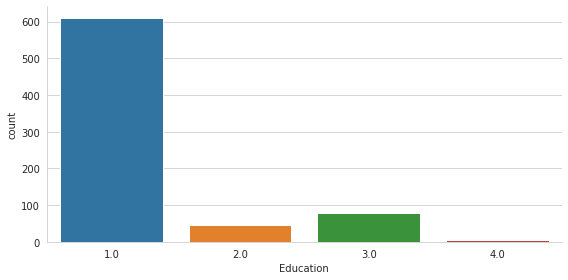

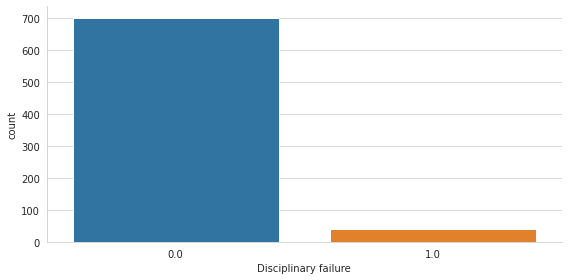

In [ ]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Weight Distribution')

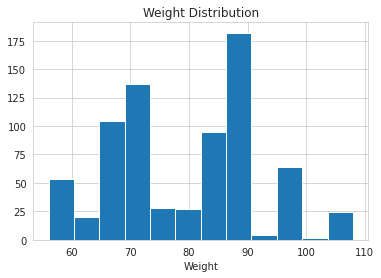

In [ ]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

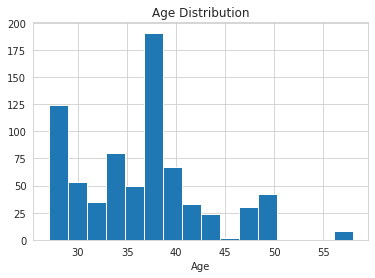

In [ ]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

Text(0, 0.5, 'Count of bikes')

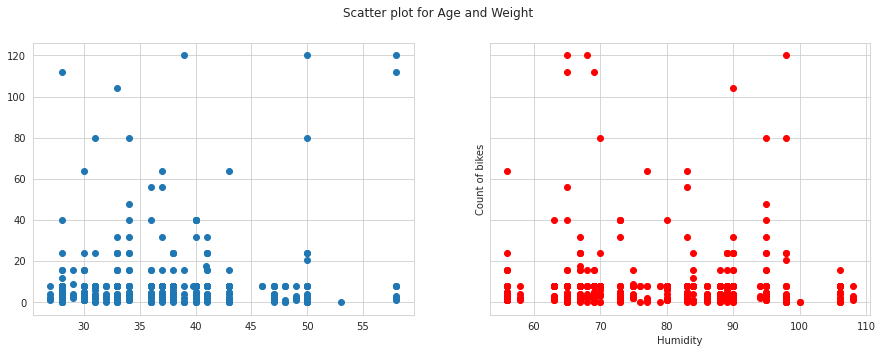

In [ ]:
#Check the distribution of Temperature and Humdity against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='Age', y='Absenteeism time in hours')
axs[1].scatter(data=df, x='Weight', y='Absenteeism time in hours', color = 'red')
fig.suptitle('Scatter plot for Age and Weight')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

In [ ]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

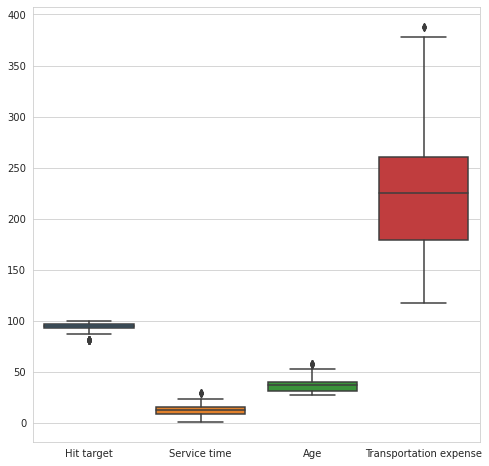

In [ ]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

Outlier Analysis

In [ ]:
#Check for outliers using boxplots
for i in continuous_vars:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Impute missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.124
Imputing row 101/740 with 1 missing, elapsed time: 0.126
Imputing row 201/740 with 0 missing, elapsed time: 0.127
Imputing row 301/740 with 0 missing, elapsed time: 0.129
Imputing row 401/740 with 0 missing, elapsed time: 0.130
Imputing row 501/740 with 0 missing, elapsed time: 0.132
Imputing row 601/740 with 0 missing, elapsed time: 0.133
Imputing row 701/740 with 0 missing, elapsed time: 0.134


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

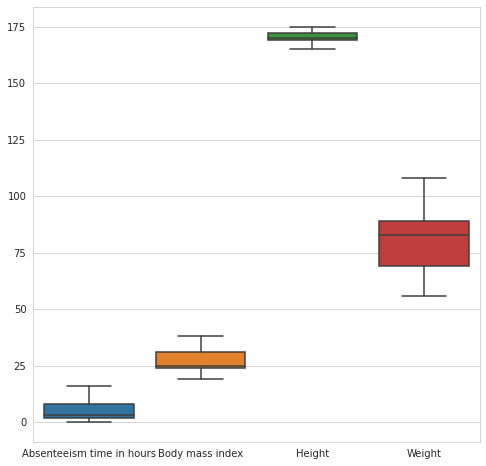

In [ ]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

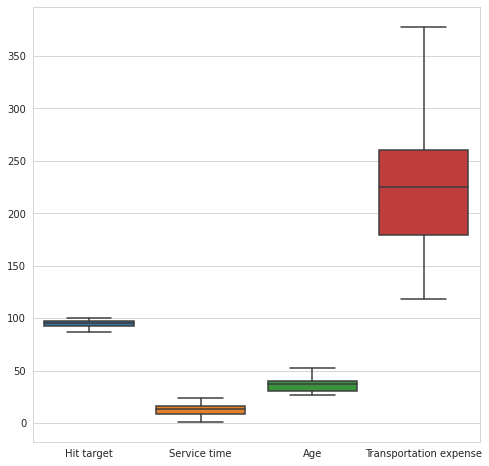

In [ ]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

Feature Selection

In [ ]:
#Get dataframe with all continuous variables
df_corr = df.loc[:,continuous_vars]

<ipython-input-44-7db679a6c802>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


[]

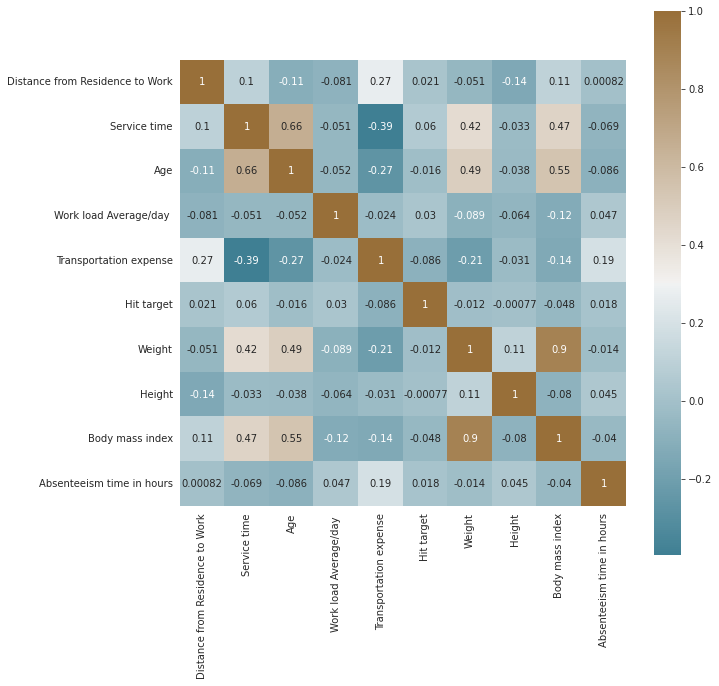

In [ ]:
#Check for multicollinearity using corelation graph
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [ ]:
#Variable Reduction
to_drop = ['Weight']
df = df.drop(to_drop, axis = 1)

In [ ]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('Weight')

In [ ]:
#Make a copy of clean data and export it as excel file
clean_data = df.copy()     

In [ ]:
continuous_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [ ]:
clean_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.000000,4.0
1,36.0,20.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,170.000004,30.808145,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.000000,31.000000,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,168.000000,24.000000,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11.0,14.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.000000,8.0
736,1.0,11.0,7.0,3.0,1.0,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,3.0,1.0,0.0,0.0,1.0,172.000000,29.000000,4.0
737,4.0,20.0,6.0,3.0,1.0,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,170.000000,34.000000,0.0
738,8.0,20.0,6.0,4.0,2.0,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,1.0,2.0,1.0,0.0,2.0,170.000000,35.000000,0.0


In [ ]:
clean_data.shape

(740, 20)

Feature Scaling

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


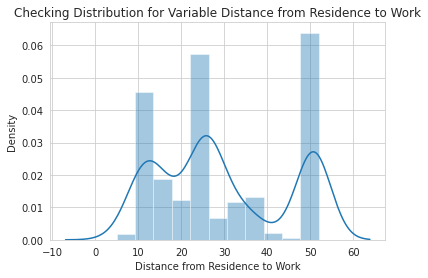

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


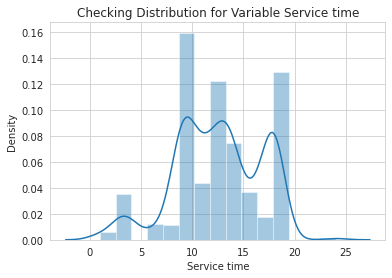

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


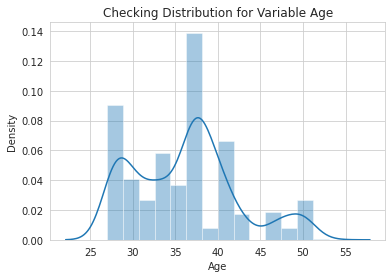

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


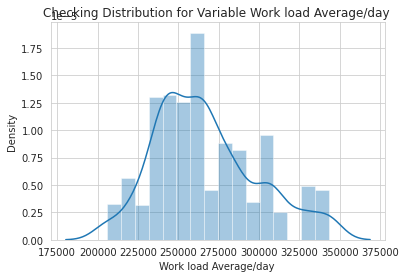

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


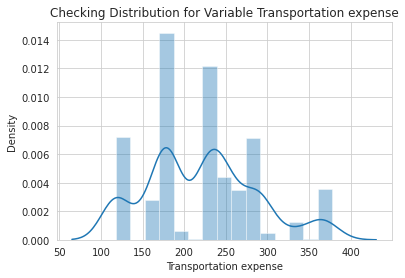

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


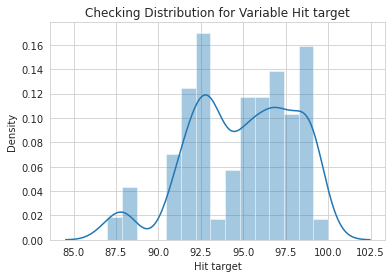

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


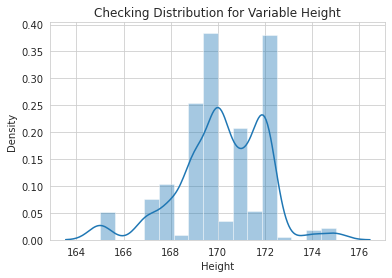

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


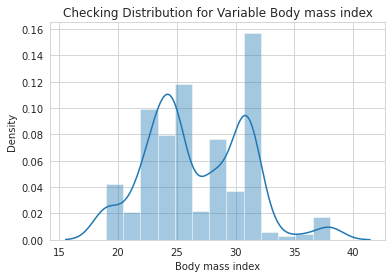

In [ ]:
#Normality check
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [ ]:
#Normalization of continuous variables
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

Machine Learning Models

In [ ]:
#Create dummy variables of factor variables
df = pd.get_dummies(data = df, columns = categorical_vars)

# Copying dataframe
df1 = df.copy()

In [ ]:
#Get number of rows and columns
df.shape

(740, 115)

In [ ]:
#Observe the first row
df.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1.0,...,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.7,0.578947,4.0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
#Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.20, random_state = 1)

Decision Tree
RMSE: 4.056
R-squared: -0.4481

In [ ]:

# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual      pred
681     8.0  8.000000
257     2.0  3.871452
527     8.0  8.000000
637     8.0  2.000000
429     4.0  1.000000
Root Mean Squared Error: 3.831627165321648
R^2 Score(coefficient of determination) = -0.2918373699513601


Random Forest
RMSE: 2.7114
R-squared: 0.353

In [ ]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
681     8.0  4.811646
257     2.0  3.777573
527     8.0  5.634267
637     8.0  3.366537
429     4.0  3.201040
Root Mean Squared Error: 2.716541983238569
R^2 Score(coefficient of determination) = 0.35065694659935964


Linear Regression
RMSE: 40145e+8
R-squared: -1.4181e+24

In [ ]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual      pred
681     8.0  2.324219
257     2.0  2.984375
527     8.0  7.253906
637     8.0  4.578125
429     4.0  3.031250
Root Mean Squared Error: 4708152322929.001
R^2 Score(coefficient of determination) = -1.9504838851757904e+24


Dimension Reduction using PCA

In [ ]:
#Get the target variable
target = df['Absenteeism time in hours']

In [ ]:
#Get the number of rows and columns of data
df.shape

(740, 115)

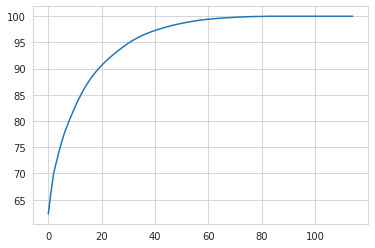

In [ ]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = df.values

#Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(X)

#Proportion of variance explained
var= pca.explained_variance_ratio_

#Cumulative scree plot
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [ ]:
#Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

Decision Tree

RMSE: 0.0353

R-squared: **0.9998**

In [ ]:
#Build decsion tree using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 1).fit(X_train,y_train)

#Perdict for test cases
dt_predictions = dt_model.predict(X_test)

#Create data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': y_test, 'pred': dt_predictions})
print(df_dt.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, dt_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, dt_predictions)))

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0
Root Mean Squared Error: 0.04875027929767174
R^2 Score(coefficient of determination) = 0.9997908799988486


Random Forest

RMSE: 0.04453
bold text
R-squared: 0.9998

In [ ]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, rf_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, rf_predictions)))

     actual      pred
681     8.0  8.000000
257     2.0  1.999581
527     8.0  8.000000
637     8.0  8.000000
429     4.0  4.001428
Root Mean Squared Error: 0.04562134679454629
R^2 Score(coefficient of determination) = 0.9998168623823864


Linear Regression

RMSE: 0.0013

R-squared: 0.9999
bold text

In [ ]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
lr_model = LinearRegression().fit(X_train , y_train)

#Perdict for test cases
lr_predictions = lr_model.predict(X_test)

#Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

#Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))

     actual  pred
681     8.0   8.0
257     2.0   2.0
527     8.0   8.0
637     8.0   8.0
429     4.0   4.0
Root Mean Squared Error: 0.0003226983510013023
R^2 Score(coefficient of determination) = 0.9999999908370599
